# COURSE:   PGP [AI&ML]

## Learner :  Chaitanya Kumar Battula
## Module  : Machine Learning
## Topic   : Time Series Modeling-2

EXPLORATION OF TIME SERIES DATA

Objectives:
        -Stationarity Check 
        -Data Transformation to achieve Stationarity

In [1]:
import pandas as pd, numpy as np, matplotlib.pylab as plt
%matplotlib inline

from datetime import datetime as dt

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, pacf, adfuller


from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6

import warnings
warnings.filterwarnings('ignore')

In [25]:
file = "AirPassengers.csv"
data = pd.read_csv(file)
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
data['Month']=pd.to_datetime(data['Month'], infer_datetime_format=True)
data=data.set_index(['Month'])
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


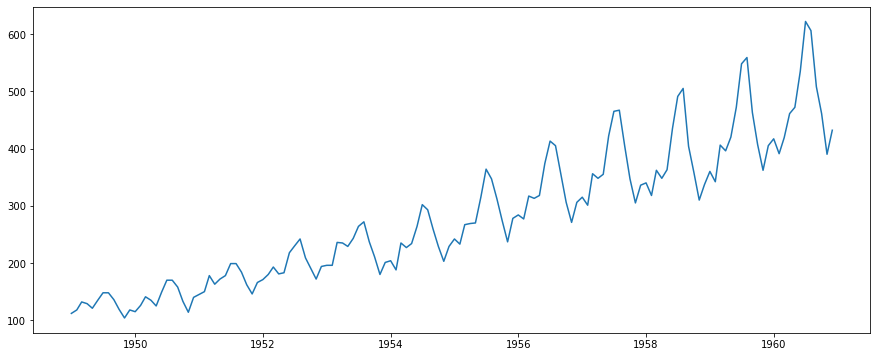

In [5]:
ts = data['#Passengers']
ts
plt.plot(ts)

In [6]:
ts_log = np.log(ts)

In [7]:
def test_stationity(timeseries):
    rolmean = timeseries.rolling(window=52, center=False).mean()
    rolstd  = timeseries.rolling(window=52, center=False).std()
    
    orig    = plt.plot(timeseries, color='blue', label='Original')
    mean    = plt.plot(rolmean, color='red', label='Rolling Mean') 
    std     = plt.plot(rolstd, color='green', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    print(dfoutput)

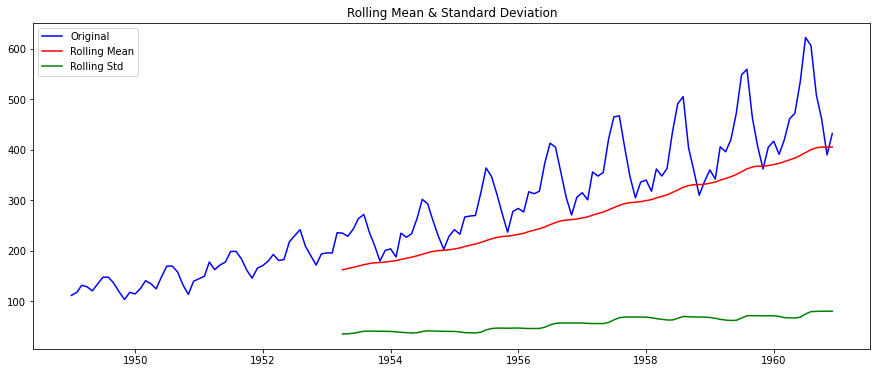

Results of Dickey Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [8]:
test_stationity(data['#Passengers'])

from the above results, Test Statistic is more than critical value and the moving averate is not constant over time.
So, null hypothesis of dickey fullet test is rejected.
This shows time series is not stationary.



Decomposing data

pandas.core.series.Series

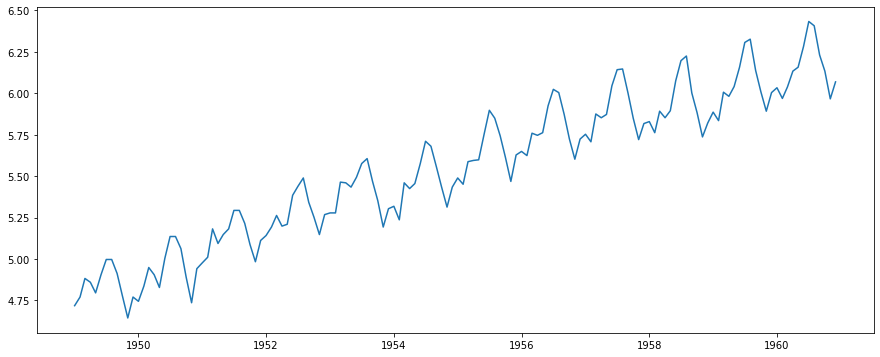

In [9]:
ts_log = np.log(ts)
plt.plot(ts_log)
type(ts_log)

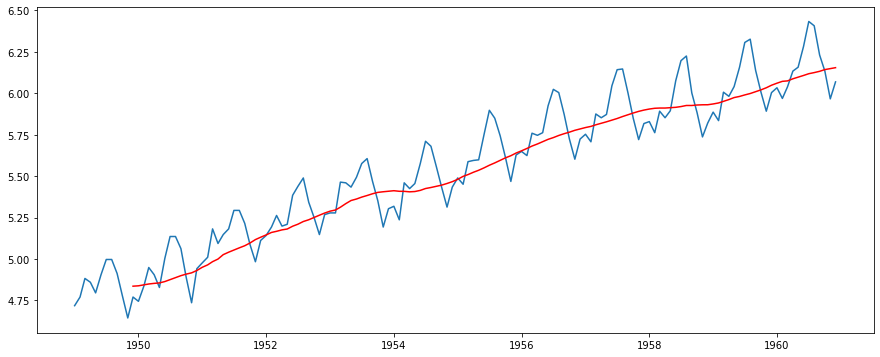

In [10]:
movingAverage = ts_log.rolling(window=12).mean()
movingSTD     = ts_log.rolling(window=12).std()
    
plt.plot(ts_log)
plt.plot(movingAverage, color='red') 
#std     = plt.plot(rolstd, color='green', label='Rolling Std')

In [11]:
ts_log_mv_diff= ts_log -movingAverage
ts_log_mv_diff

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
                ...   
1960-08-01    0.282363
1960-09-01    0.098235
1960-10-01   -0.009230
1960-11-01   -0.182690
1960-12-01   -0.085789
Name: #Passengers, Length: 144, dtype: float64

In [12]:
ts_log_mv_diff.dropna(inplace=True)
ts_log_mv_diff

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
                ...   
1960-08-01    0.282363
1960-09-01    0.098235
1960-10-01   -0.009230
1960-11-01   -0.182690
1960-12-01   -0.085789
Name: #Passengers, Length: 133, dtype: float64

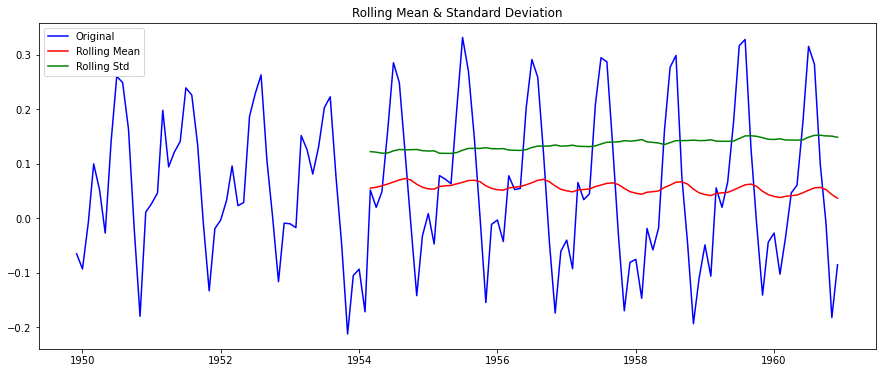

Results of Dickey Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [13]:
test_stationity(ts_log_mv_diff)

# Air_Passenger_Simpli Learn- Part-2

[]

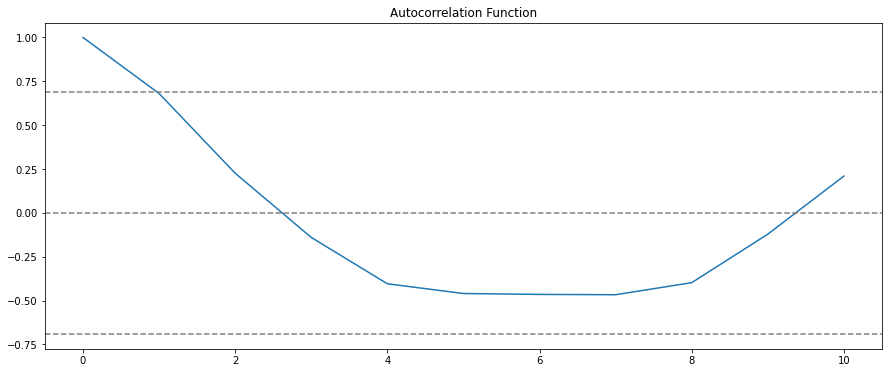

In [14]:
plt.plot(np.arange(0,11),  acf(ts_log_mv_diff, nlags=10))
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-7.96/np.sqrt(len(ts_log_mv_diff)) , linestyle='--', color='gray')
plt.axhline(y= 7.96/np.sqrt(len(ts_log_mv_diff)) , linestyle='--', color='gray')
plt.title('Autocorrelation Function')
plt.plot()

[]

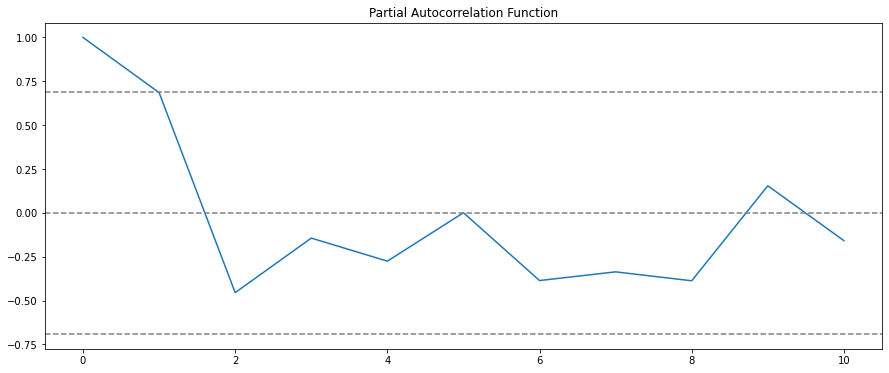

In [15]:
plt.plot(np.arange(0,11),  pacf(ts_log_mv_diff, nlags=10))
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-7.96/np.sqrt(len(ts_log_mv_diff)) , linestyle='--', color='gray')
plt.axhline(y= 7.96/np.sqrt(len(ts_log_mv_diff)) , linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.plot()

Text(0.5, 1.0, 'RSS 36.37625741902521')

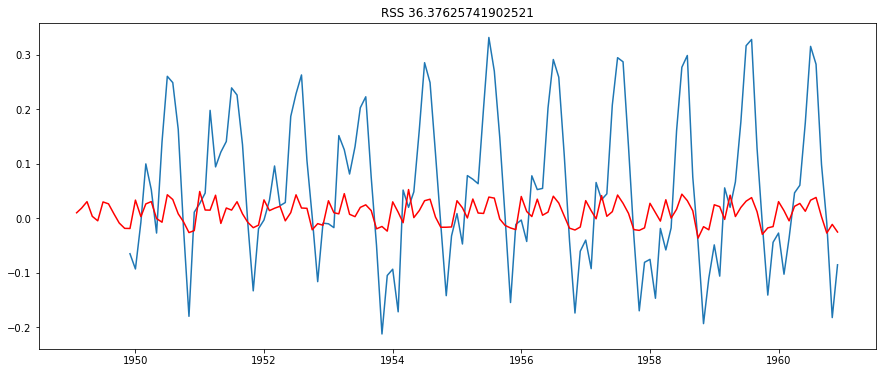

In [16]:
model = ARIMA(ts_log, order=(1,1,0))
results_ARIMA = model.fit(disp=-1)

plt.plot(ts_log_mv_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
z=np.nansum(results_ARIMA.fittedvalues[1:] - ts_log_mv_diff)**2
plt.title('RSS {}'.format(z))


In [17]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

Month
1949-02-01    0.009676
1949-03-01    0.018164
1949-04-01    0.030130
1949-05-01    0.003154
1949-06-01   -0.005039
dtype: float64

In [18]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff.cumsum()

Month
1949-02-01    0.009676
1949-03-01    0.027839
1949-04-01    0.057969
1949-05-01    0.061123
1949-06-01    0.056084
                ...   
1960-08-01    1.420640
1960-09-01    1.423181
1960-10-01    1.395704
1960-11-01    1.384064
1960-12-01    1.358413
Length: 143, dtype: float64